<a href="https://colab.research.google.com/github/Sreerag-Pillai/Data_Science/blob/main/Food_Price_Inflation_Population_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining Corelation Between Food Price Inflation and Population Growth Over the Decades

Summary:

* Importing necessary libraries and modules for analysis.
* Loading the food price inflation (FPI) and US Census Data (USCD) datasets and preprocessing the datasets
* Adjusting the temporal scale of the datasets to ensure they are on the same temporal scale.
* Creating a new DataFrame to convert food price inflation from an annual to a decadal basis.
* Merging the datasets (new dataframe and USCD).
* Calculating and displaying the correlation matrix for all required parameters
* Visualizing the data
* Conclusion

In [ ]:
# Importing necessary libraries and modules for analysis

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1.   Loading and Preprocessing the Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1.1 Loading the data

In [ ]:
#loading Food price index
food_index = pd.read_excel("/content/drive/MyDrive/Data mining UHCL SU23/FoodPrices_2013 to 2023.xlsx", header = [0])
#Displaying the data
food_index.head(10)

,Year,USD Value,Inflation Rate
0,1913,20.00,-
1,1914,20.47,0.0233
2,1915,20.26,-0.0098
3,1916,22.73,0.1217
4,1917,29.24,0.2865
5,1918,33.66,0.1511
6,1919,37.44,0.1124
7,1920,42.28,0.1292
8,1921,32.05,-0.242
9,1922,30.02,-0.0634


In [ ]:
#loading U.S. census data and merging the first two rows to get header
population_data = pd.read_excel("/content/drive/MyDrive/Data mining UHCL SU23/US Population Data 1790 to 2020.xlsx" , header=[0,1])
#renaming header
population_data.columns  = ['decade', 'Total_Population', 'population_increase', 'population_increase_%', 'Urban_%', 'Rural_%']
#Displaying table
population_data.head(10)

,decade,Total_Population,population_increase,population_increase_%,Urban_%,Rural_%
0,1790,3929214,-,-,5.1,94.9
1,1800,5308483,1379269,35.1,6.1,93.9
2,1810,7239881,1931398,36.4,15.4,92.7
3,1820,9638453,2398572,33.1,7.2,92.8
4,1830,12860702,3222249,33.4,8.8,91.2
5,1840,17063353,4202651,32.7,10.8,89.2
6,1850,23191876,6128523,35.9,15.4,84.6
7,1860,31443321,8251445,35.6,19.8,80.2
8,1870,38558371,7115050,22.6,25.7,74.3
9,1880,50189209,11630838,30.2,28.2,71.8


### Step 1.2 Preprocessing the data

#### Step 1.21 Checking for special characters

In [ ]:
# function for Checking for special character
def special_char(df, col):
    col = str(col)
    special_cha = df[col].astype(str).str.contains(r'[!@#$^&*()%]', regex=True, na=False)
    if any(special_cha):
        print(f"Special characters found in coloumn '{col}':")
        print(df[special_cha])

#checking in population_data
for col_name, column_data in population_data.items():
    special_char(population_data, col_name)

In [ ]:
#checking in food_index
for col_name, column_data in food_index.items():
    special_char(food_index, col_name)

Special characters found in coloumn 'Inflation Rate':
     Year  USD Value Inflation Rate
110  2023     646.04         4.96%*


#### Step 1.22 Removing special characters

In [ ]:
# defining a function to remove special characters

def remove_special_chars(df):
    # Define the pattern of special characters
    pattern = r'[!@#$%^&*()]'
    # Replacing special characters with an empty string
    for col in df.columns:
        df[col] = df[col].astype(str).apply(lambda x: re.sub(pattern, '' , x))
    return df

# Removing special characters from food_index
remove_special_chars(food_index)

#checking for special characters in food_index
for col_name, column_data in food_index.items():
  if special_char(food_index, col_name) != None:
    print(special_char(food_index, col_name))
  else:
    print("no special charecters found")


no special charecters found
no special charecters found
no special charecters found
no special charecters found


In [ ]:
# replacing value for inflation rate at index 0 with 0
food_index.at[0, 'Inflation Rate'] = 0
#replacing the index 110 with correct value after removing special character
food_index.at[110, 'Inflation Rate'] = 0.0496

food_index

,Year,USD Value,Inflation Rate
0,1913,20.0,0
1,1914,20.47,0.0233
2,1915,20.26,-0.0098
3,1916,22.73,0.1217
4,1917,29.24,0.2865
...,...,...,...
106,2019,520.64,0.0188
107,2020,538.58,0.0345
108,2021,559.82,0.0394
109,2022,615.51,0.0995


#### Step 1.23 checking for missing value and replacing missing value

In [ ]:
#checking for null value in food_index
food_index.isnull().sum()

Year              0
USD Value         0
Inflation Rate    0
dtype: int64

In [ ]:
#checking for null value in population_data
population_data.isnull().sum()

decade                   0
Total_Population         0
population_increase      0
population_increase_%    0
Urban_%                  1
Rural_%                  1
dtype: int64

In [ ]:
# Rows where 'Urban_%' is missing
missing_urban = population_data[population_data['Urban_%'].isnull()]
print(missing_urban)

    decade  Total_Population population_increase population_increase_%  \
23    2020         331449281            22703743                   7.4   

    Urban_%  Rural_%  
23      NaN      NaN  


In [ ]:
#replacing the null value through forward filling - using previous decades values

population_data['Urban_%'].fillna(method='ffill', inplace=True)
population_data['Rural_%'].fillna(method='ffill', inplace=True)

#checking for null values
population_data.isnull().sum()

decade                   0
Total_Population         0
population_increase      0
population_increase_%    0
Urban_%                  0
Rural_%                  0
dtype: int64

#### Step 1.24: Adjusting temporal scale:
To ensure that both datasets are on the same temporal scale because food price inflation (FPI) data is annual and U.S. census data (CD) is for consecutive decades. To transform the Food Price Index (FPI) data from an annual to a decadal basis, the cumulative annual inflation was calculated for each decade and then decade-over-decade change was calculated. For the first decade (1910s), the cumulative inflation rate was only calculated from 1913 to 1919 (7 years).

In [ ]:
# Adding 3 years (1910, 1911, 1912) to the food_index with feature values as zero

new_rows = pd.DataFrame({
    'Year': [1910, 1911, 1912, 2024, 2025, 2026, 2027, 2028, 2029],
    'USD Value': [0,0,0,0,0,0,0,0,0],
    'Inflation Rate': [0,0,0,0,0,0,0,0,0]
})

# Concatenate the new rows with the original DataFrame
food_index = pd.concat([new_rows, food_index], ignore_index= True)
food_index

,Year,USD Value,Inflation Rate
0,1910,0,0
1,1911,0,0
2,1912,0,0
3,2024,0,0
4,2025,0,0
...,...,...,...
115,2019,520.64,0.0188
116,2020,538.58,0.0345
117,2021,559.82,0.0394
118,2022,615.51,0.0995


In [ ]:
# Create a new DataFrame for the decade data
decade_food_index = pd.DataFrame()

# Convert 'Year' column to integers and create a 'decade' column
food_index['Year'] = food_index['Year'].astype(int)
food_index['decade'] = (food_index['Year'] // 10) * 10

# Convert 'Inflation Rate' column to float
food_index['Inflation Rate'] = pd.to_numeric(food_index['Inflation Rate'], errors='coerce')
#checking for null values
# food_index.isna().sum()

# Group by 'decade' and calculate the sum of 'Inflation Rate'
grouped = food_index.groupby('decade')['Inflation Rate'].sum().reset_index()

# Assign the results to the decade_food_index DataFrame
decade_food_index['decade'] = grouped['decade']
decade_food_index['inflation_rate_%'] = grouped['Inflation Rate'] * 100

# Calculate the decade over decade inflation change
decade_food_index['inflation_change_%'] = decade_food_index['inflation_rate_%'].diff()
#decade_food_index

#filling null value with zero
decade_food_index.fillna(0, inplace=True)
decade_food_index



,decade,inflation_rate_%,inflation_change_%
0,1910,68.52,0.00
1,1920,-7.12,-75.64
2,1930,-28.27,-21.15
3,1940,80.98,109.25
4,1950,17.64,-63.34
5,1960,22.76,5.12
6,1970,80.50,57.74
7,1980,46.03,-34.47
8,1990,27.58,-18.45
9,2000,28.84,1.26


#### Step 1.25: Merging data


*   To align the time periods of both datasets to match the time periods in both datasets (1910 – 2020). From the CD dataset, the data from the decade 1910 was merged.



In [ ]:
#merging the datasets
merged_df = pd.merge(decade_food_index, population_data, on='decade')

merged_df

,decade,inflation_rate_%,inflation_change_%,Total_Population,population_increase,population_increase_%,Urban_%,Rural_%
0,1910,68.52,0.00,92228496,16016328,21,45.6,54.4
1,1920,-7.12,-75.64,106021537,13793041,15,51.2,48.8
2,1930,-28.27,-21.15,123202624,17181087,16.2,56.1,43.9
3,1940,80.98,109.25,142164569,18961945,15.4,56.5,43.5
4,1950,17.64,-63.34,161325798,19161229,14.5,64.0,36.0
5,1960,22.76,5.12,189323175,27997377,18.5,69.9,30.1
6,1970,80.50,57.74,213302031,23978856,13.4,73.6,26.3
7,1980,46.03,-34.47,236542199,23240168,11.4,73.7,26.3
8,1990,27.58,-18.45,258709873,22167674,9.8,75.2,24.8
9,2000,28.84,1.26,291421906,32712033,13.2,81.0,19.0


Step 1.25: Calculating cumulative inflation rate and population growth

In [ ]:
# Add columns with cumulative sum for 'inflation_rate_%' and 'increase_%'
merged_df['inflation_rate_cumsum_%'] = merged_df['inflation_rate_%'].cumsum()
merged_df['population_increase_cumsum_%'] = merged_df['population_increase_%'].cumsum()

# Print the updated DataFrame
print(merged_df)

    decade  inflation_rate_%  inflation_change_%  Total_Population  \
0     1910             68.52                0.00          92228496   
1     1920             -7.12              -75.64         106021537   
2     1930            -28.27              -21.15         123202624   
3     1940             80.98              109.25         142164569   
4     1950             17.64              -63.34         161325798   
5     1960             22.76                5.12         189323175   
6     1970             80.50               57.74         213302031   
7     1980             46.03              -34.47         236542199   
8     1990             27.58              -18.45         258709873   
9     2000             28.84                1.26         291421906   
10    2010             17.19              -11.65         308745538   
11    2020             22.30                5.11         331449281   

   population_increase population_increase_%  Urban_%  Rural_%  \
0             16016328 

### Step 2: Determining if rate of increase in Food Price Inflation and Population growth over the decades are correlated


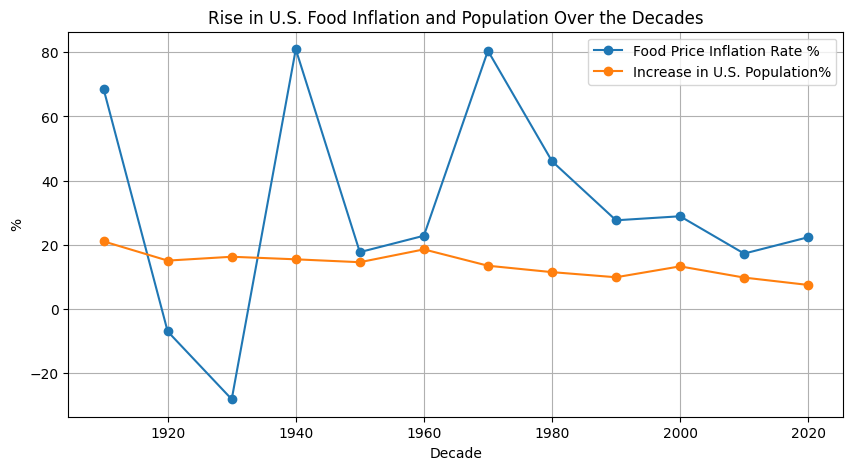

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(merged_df['decade'], merged_df['inflation_rate_%'], marker='o', label='Food Price Inflation Rate %')
plt.plot(merged_df['decade'], merged_df['population_increase_%'], marker='o', label='Increase in U.S. Population%')
plt.title('Rise in U.S. Food Inflation and Population Over the Decades')
plt.xlabel('Decade')
plt.ylabel('%')
plt.legend()
plt.grid(True)
plt.show()

Visualizing the cumulative foot price inflation % and population increase % over the decades to understand more about the correlation between two parameters

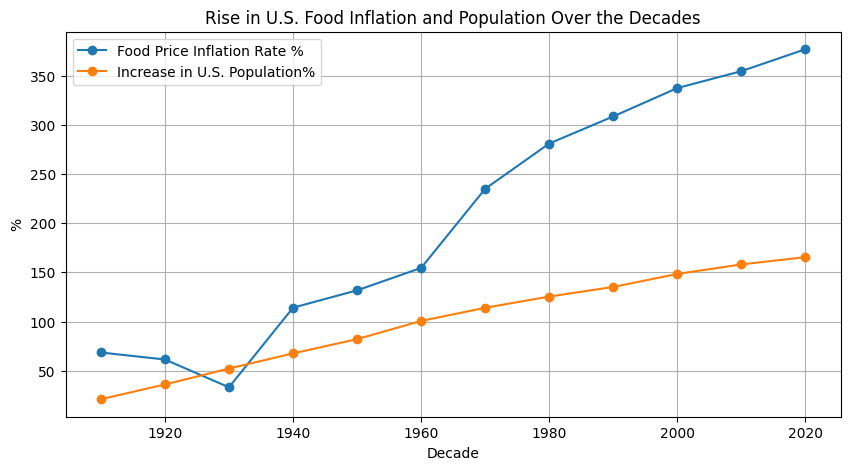

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(merged_df['decade'], merged_df['inflation_rate_cumsum_%'], marker='o', label='Food Price Inflation Rate %')
plt.plot(merged_df['decade'], merged_df['population_increase_cumsum_%'], marker='o', label='Increase in U.S. Population%')
plt.title('Rise in U.S. Food Inflation and Population Over the Decades')
plt.xlabel('Decade')
plt.ylabel('%')
plt.legend()
plt.grid(True)
plt.show()

#### Step 2.1: Calculating and displaying correlation matrix

Visualizing corelation matrix for all cumulative values

In [ ]:
#creating a new dataframe for needed variables for corelation analysis

corr_df = merged_df[['decade', 'inflation_rate_cumsum_%','population_increase_cumsum_%']]

# Convert non-numeric columns to numeric type
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')
#checking for null values
# corr_df.isna().sum()

# Calculate the correlation matrix
corr_matrix = corr_df.corr(method='pearson')
corr_matrix


,decade,inflation_rate_cumsum_%,population_increase_cumsum_%
decade,1.000000,0.974538,0.995056
inflation_rate_cumsum_%,0.974538,1.000000,0.967599
population_increase_cumsum_%,0.995056,0.967599,1.000000


<Axes: >

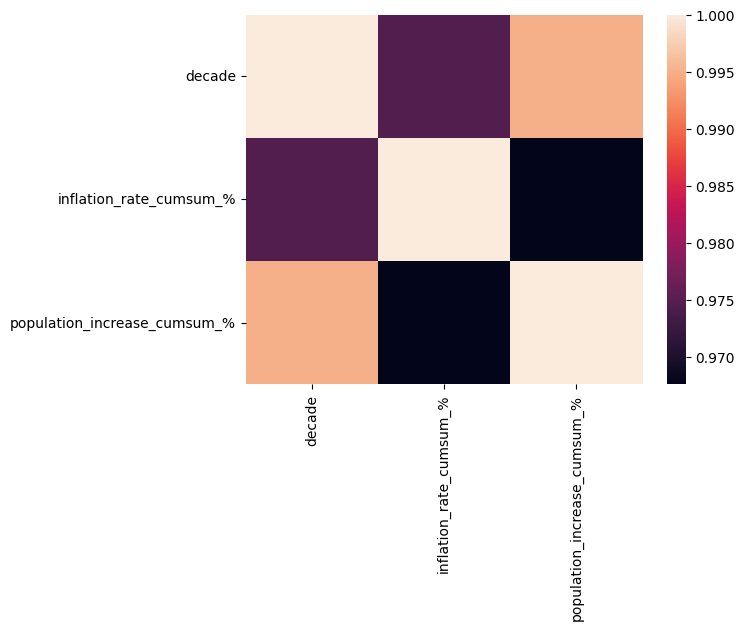

In [ ]:
# visualizing corelation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix)

Calcualting spearman correlation matrix since it is less sensitive to outliers

In [ ]:
# Calculate the spearman correlation matrix
sp_corr_matrix = corr_df.corr(method='spearman')
sp_corr_matrix


,decade,inflation_rate_cumsum_%,population_increase_cumsum_%
decade,1.000000,0.972028,1.000000
inflation_rate_cumsum_%,0.972028,1.000000,0.972028
population_increase_cumsum_%,1.000000,0.972028,1.000000


<Axes: >

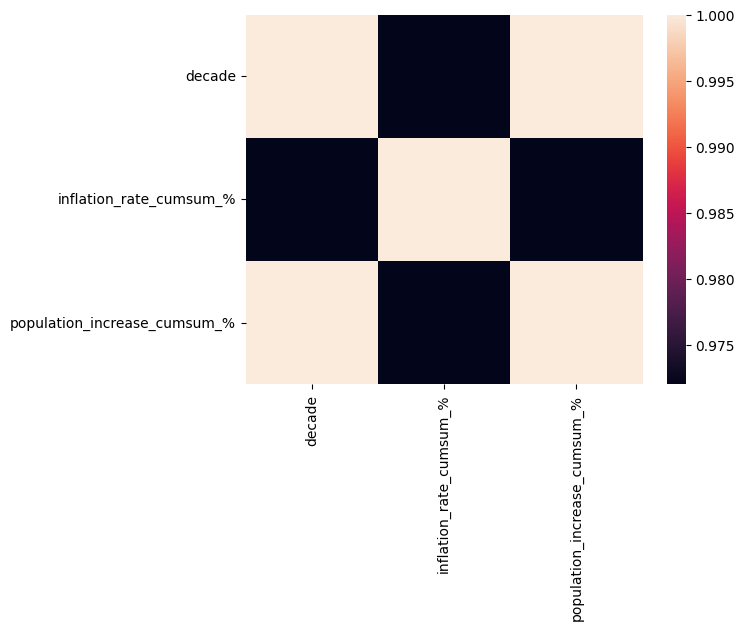

In [ ]:
# visualizing correlation matrix as a heatmap using seaborn
sns.heatmap(sp_corr_matrix)

#### Step 2.2: Visualizing scatter plot between Cumulative Inflation Rate over the decade (%) and Cumulative Population Increase over the decade (%)

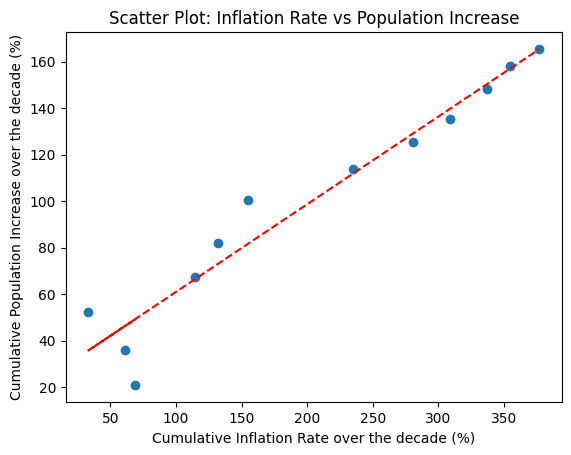

In [ ]:
# checking for data types of both attributes
# print(merged_df['inflation_rate_cumsum_%'].dtype)
# print(merged_df['population_increase_cumsum_%'].dtype)

# converting the data types to numeric
merged_df['inflation_rate_cumsum_%'] = pd.to_numeric(merged_df['inflation_rate_cumsum_%'], errors='coerce')
merged_df['population_increase_cumsum_%'] = pd.to_numeric(merged_df['population_increase_cumsum_%'], errors='coerce')

# Create scatter plot
plt.scatter(merged_df['inflation_rate_cumsum_%'], merged_df['population_increase_cumsum_%'])

# Calculate trendline using numpy.polyfit()
z = np.polyfit(merged_df['inflation_rate_cumsum_%'], merged_df['population_increase_cumsum_%'], 1)
p = np.poly1d(z)
plt.plot(merged_df['inflation_rate_cumsum_%'], p(merged_df['inflation_rate_cumsum_%']), "r--")

# Adding labels and title
plt.xlabel('Cumulative Inflation Rate over the decade (%)')
plt.ylabel('Cumulative Population Increase over the decade (%)')
plt.title('Scatter Plot: Inflation Rate vs Population Increase')

plt.show()


# Conclusion


* Inflation Rate Cumulative Sum and Population Increase Cumulative Sum:

  * There is a very strong positive correlation between 'inflation_rate_cumsum_%' and 'population_increase_cumsum_%'.
  * This implies that as decade over decade population increases cumulative inflation also increases.
  * From the correlation matrix we could conclude that there is a strong positive relationships between these two variables.

* Inflation Rate Cumulative Sum and Decade:

  * There is a very strong positive correlation between 'inflation_rate_cumsum_%' and 'decade'.
  * This implies that inflation tends to increase as decades progresses.

* Population Increase Cumulative Sum and Decade:

  * There is a very strong positive correlation between 'population_increase_cumsum_%' and 'decade'.
  * This suggests that population also tends to increase as decades progresses.

  However, further study and considering other factors influencing both parameters is required to understand the relationship between these variables as correlation does not implies causation.